In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ipl_data.csv to ipl_data.csv


In [ ]:
df=pd.read_csv("dataset/ipl_data.csv")

In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
df.shape

(76014, 15)

Remove Unwanted Columns


In [ ]:
unwanted_columns=['mid','venue','batsman','bowler','striker','non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=unwanted_columns, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [ ]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


Keeping only consistant teams


In [ ]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


Converting 'date' from string to date-time object

In [ ]:
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


<ipython-input-17-2cff40593ed4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


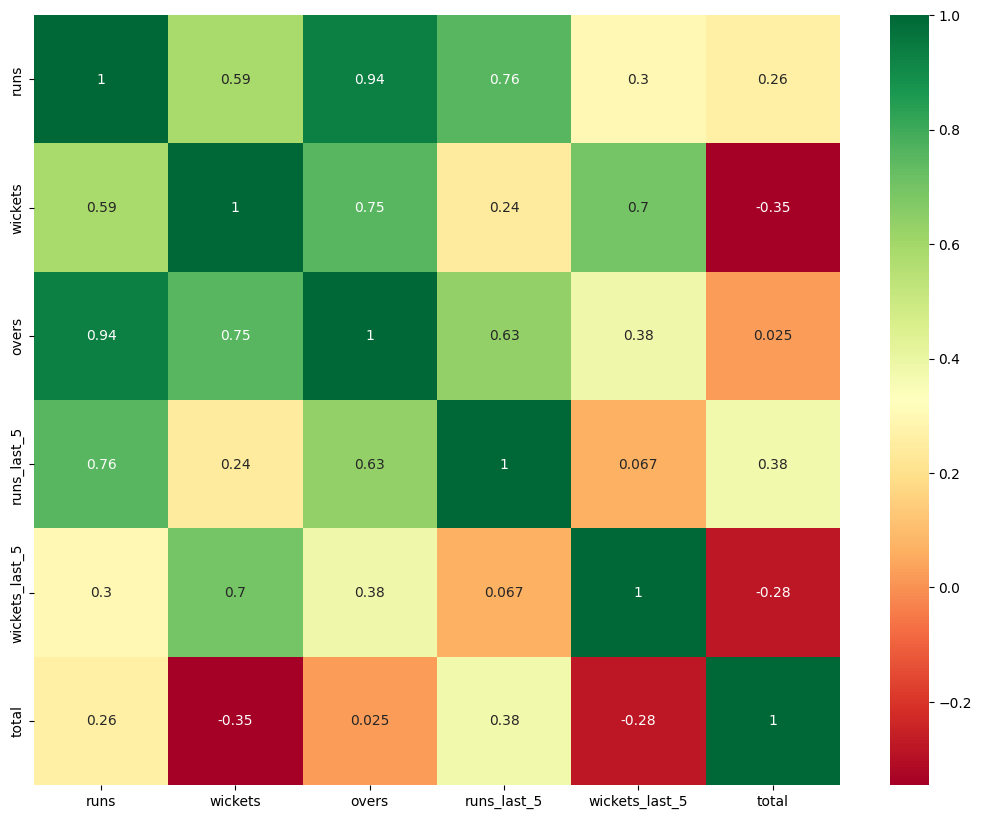

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=df.corr()
top_corr_features = corr_matrix.index

plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

**DATA PREPROCESSING**

->Handling categorical features

->Splitting dataset into train and test set on the basis of date

In [ ]:
#Divide each bat team and bowl team in5to different columns

encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [ ]:
encoded_df.head()

In [ ]:
#Rearranging the columns

encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]


In [ ]:
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (50089, 21) and Test set: (3722, 21)


**MODEL TRAINING**

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr = linear_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.86158517423824
Mean Squared Error (MSE): 403.22328348760095
Root Mean Squared Error (RMSE): 20.08042040116693


DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = decision_regressor.predict(X_test)

In [ ]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 20.460578669941917
Mean Squared Error (MSE): 748.9671334619734
Root Mean Squared Error (RMSE): 27.367263901639372


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf = random_regressor.predict(X_test)

In [ ]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.1550389152201
Mean Squared Error (MSE): 530.5875038580881
Root Mean Squared Error (RMSE): 23.0344851007807


ADABOOST ALGORITHM

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [ ]:
y_pred_adb = adb_regressor.predict(X_test)

In [ ]:
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 15.056348620666826
Mean Squared Error (MSE): 407.27983004831464
Root Mean Squared Error (RMSE): 20.18117514042021


As linear regression works best....we we will use the linear regression model

**Predictions**

• Model trained on the data from IPL Seasons 1 to 9 ie: (2008 to 2016)

• Model tested on data from IPL Season 10 ie: (2017)

• Model predicts on data from IPL Seasons 11 to 12 ie: (2018 to 2019)

In [ ]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])

In [ ]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Delhi Daredevils', overs=9.2, runs=99, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 180 to 195


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
